### Exercici 1: 
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import pyplot

warnings.filterwarnings('ignore')


df = pd.read_csv('/Users/alexvalles/Documents/Data Science/Curso Data Science Presencial/Sprint 5/Lligues europees UEFA.csv', 
                 encoding = 'ISO-8859-1', sep=";")



df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [30]:
df.describe() # Resumen estadístico del dataframe

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [18]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [19]:
df.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [31]:
df.isnull().sum() # Comprobamos que no hay valores nulos

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

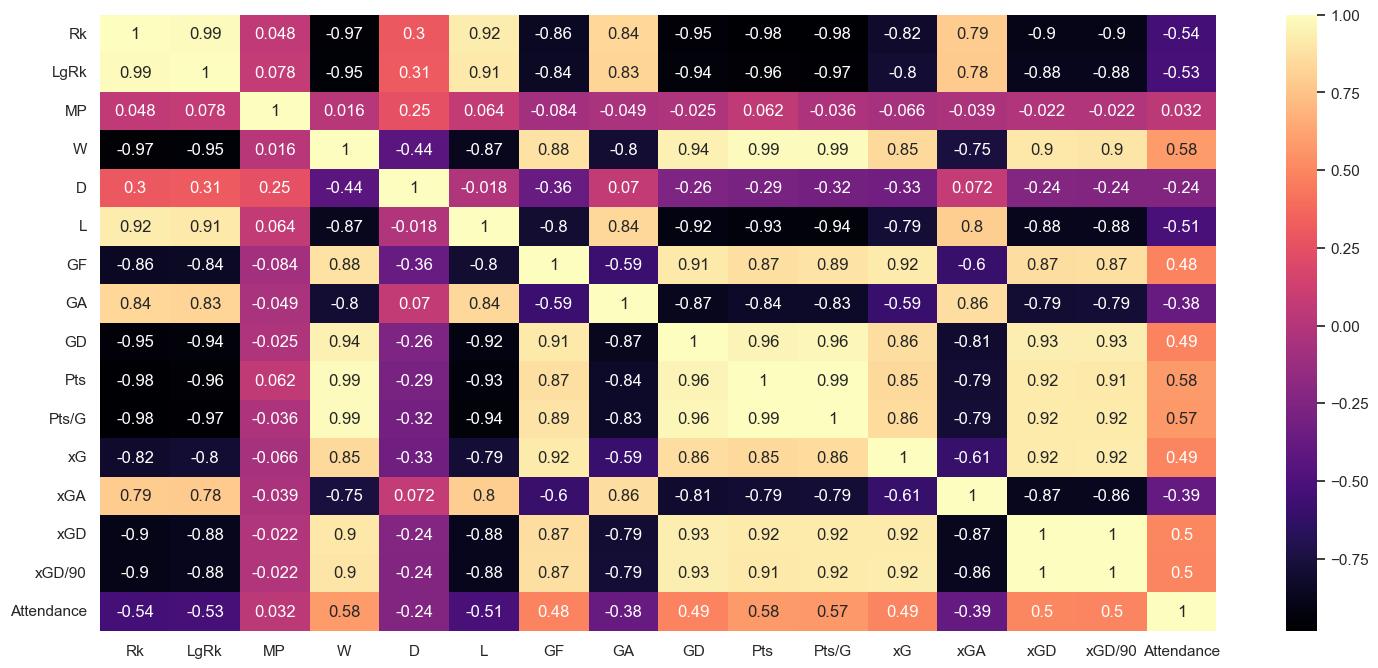

In [21]:
# Hacemos un heatmap para ver las correlaciones entre las distintas variables.

sns.heatmap(df.corr(),annot=True,cmap='magma')

sns.set(rc={"figure.figsize": (18, 8)})

stat=0.979, p=0.128
Probably Gaussian


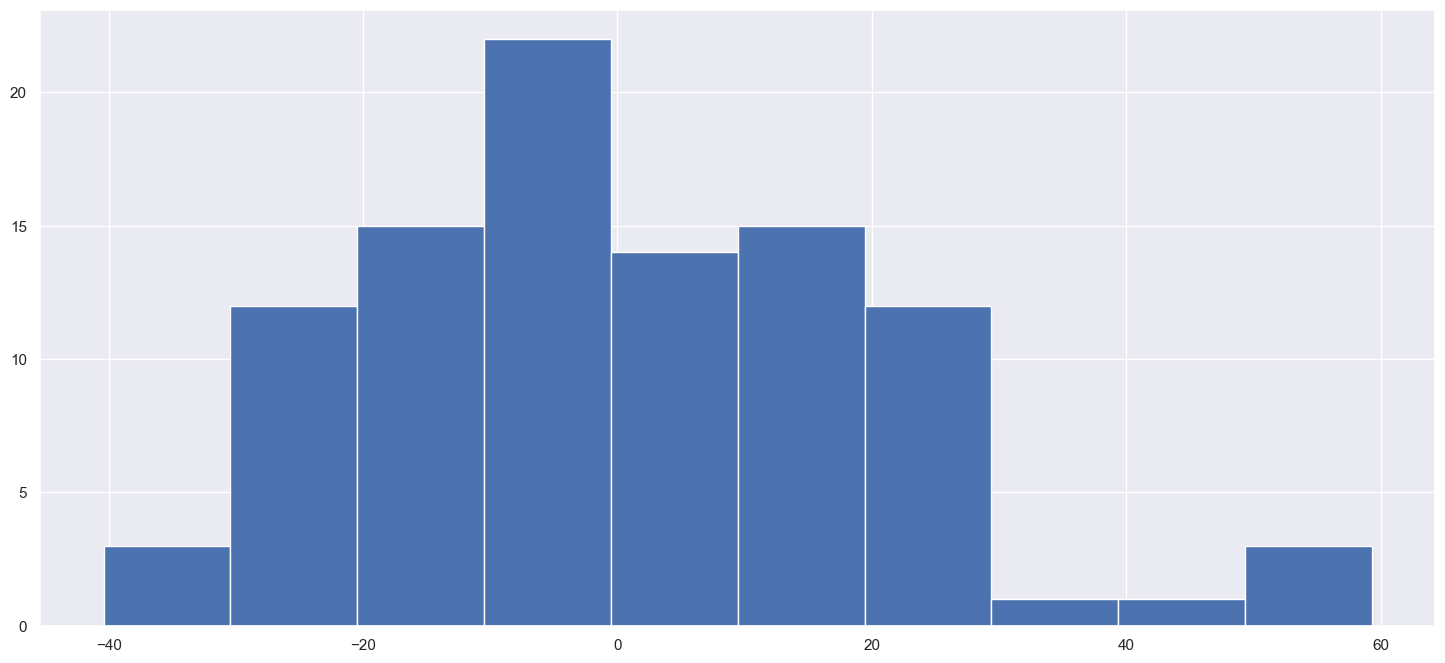

In [22]:
# Ahora calculamos el p-value para una variable. Escogemos xGD (dif. goles prevista)

from scipy.stats import shapiro

data = df['xGD']       
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

pyplot.hist(data)
pyplot.show()

Como el p-value es mayor a 0.05 (0.128), no hay suficiente evidencia para rechazar la hipótesis nula de que la distribución es normal (o gausiana). 

También un valor estadístico de 0.979 (muy cercano a 1) indica que, según el test de Shapiro-Wilk, los datos probablemente sigan una distribución normal.

En este caso, la variable xGD (Goles en contra previstos) es fiable para realizar distintos análisis estadísticos. Permitiría preveer el posible rendimiento de un equipo (victorias, derrotas, goles a favor/en contra, puntos, ranking, etc.)

### Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

stat=-0.510, p=0.000
Probablemente dependientes


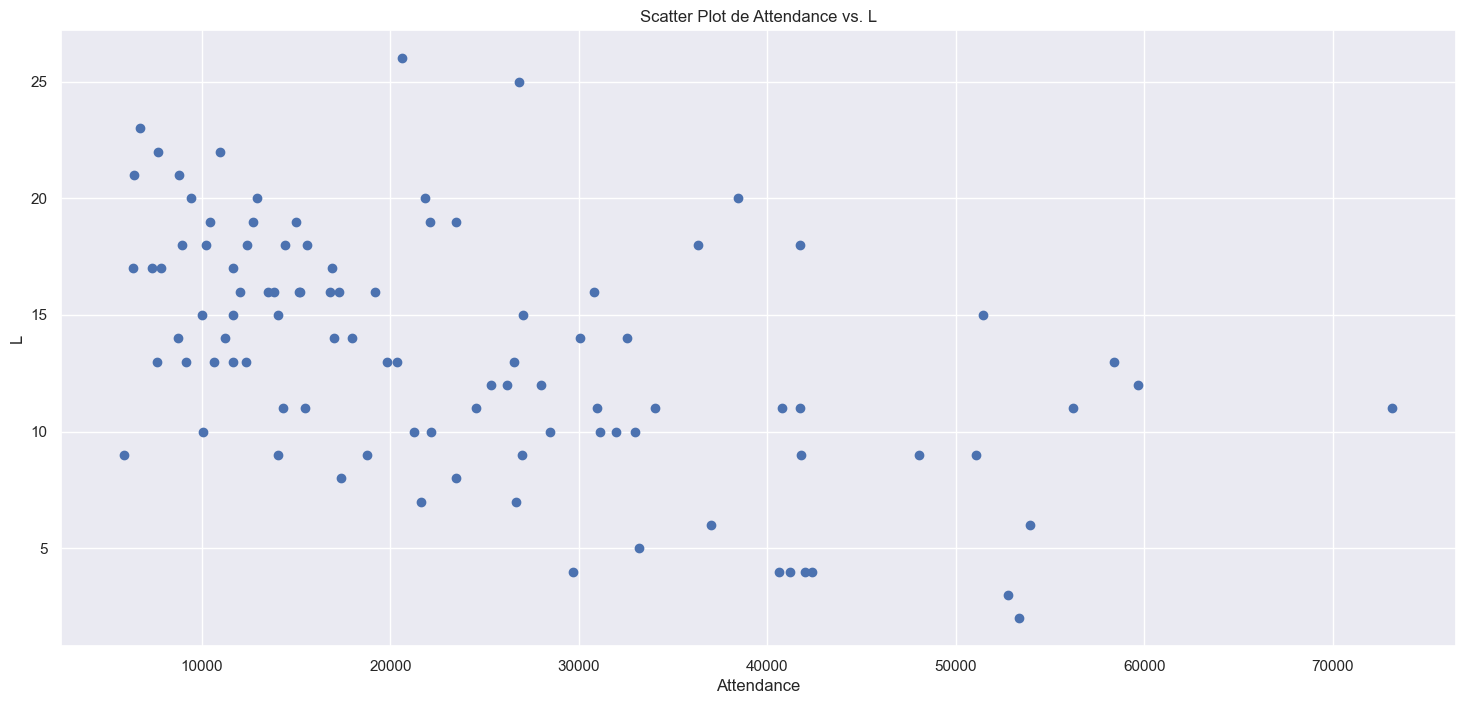

In [23]:
from scipy.stats import pearsonr

data1 = df['Attendance']
data2 = df['L']

# Hacemos prueba de correlación de Pearson de 2 variables: Seleccionamos "Attendance" y "L"

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente independentes')
else:
 print('Probablemente dependientes')

plt.scatter(data1, data2)
plt.title('Scatter Plot de Attendance vs. L')
plt.xlabel('Attendance')
plt.ylabel('L')
plt.show()

Según la prueba de correlación de Pearson, vemos que las variables 'Attendance' y 'L', son probablemente dependientes. 

Con un p-value de 0.000, se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que hay una correlación significativa entre las dos variables.

Esto quiere decir que si un equipo acumula más derrotas, la asistencia de público a los partidos tiende a ser menor, y viceversa. 

Con un valor de -0,51, la correlación es moderada, puede haber otras variables que también influyan en esta relación.

### Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# realizamos one-way ANOVA para 3 variables
# comprobamos la relación existente entre las variables W, L y GD/90 


from scipy.stats import f_oneway

stat, p = f_oneway(df['xGD/90'], df['L'], df['W'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente tienen la misma distribución')
else:
 print('Probablemente tienen distribuciones diferentes')


stat=297.434, p=0.000
Probablemente tienen distribuciones diferentes


El resultado del análisis de varianza (ANOVA) confirma que hay diferencias entre las medias de estas variables, las distribuciones son diferentes.

El valor del estadístico de prueba (stat = 297.434) indica que hay variabilidad significativa entre las medias de los grupos.

El p-value = 0.000, indica que existe evidencia significativa para rechazar la hipótesis nula de que las medias son iguales. Esto podría significar que equipos con diferentes niveles de diferencia de goles prevista en 90 minutos tienen, en promedio, un número diferente de victorias y derrotas.

La significativa diferencia en las medias, sugiere que el rendimiento en términos de victorias y derrotas podría estar relacionado en buena parte con la diferencia de goles prevista ('xGD/90').

A continuación haremos el test post-hoc Tukey para ver entre qué variables hay esas  diferencias en las medias.

In [39]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Primero hemos de preparar los datos para ejecutar la prueba de Tukey HSD
# Concatenamos las 3 variables en una misma columna:

data_for_tukey = pd.concat([df['W'], df['xGD/90'], df['L']])


# Creamos las etiquetas de grupo para cada observación:
labels = ['W'] * len(df['W']) + ['xGD/90'] * len(df['xGD/90']) + ['L'] * len(df['L'])


# Ahora ya podemos realizar la prueba de Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=data_for_tukey, groups=labels, alpha=0.05)


print(tukey_result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     L      W      0.0   1.0  -1.4999   1.4999  False
     L xGD/90 -13.4481   0.0 -14.9479 -11.9482   True
     W xGD/90 -13.4481   0.0 -14.9479 -11.9482   True
-----------------------------------------------------


Con test post hoc de Tukey HSD, vemos entre qué variables están esas diferencias  entre medias.

No hay una diferencia significativa entre las medias de derrotas ('L') y victorias ('W').

Hay una diferencia significativa entre las medias de derrotas ('L') y la diferencia de goles prevista en 90 minutos ('xGD/90').

Hay una diferencia significativa entre las medias de victorias ('W') y la diferencia de goles prevista en 90 minutos ('xGD/90').



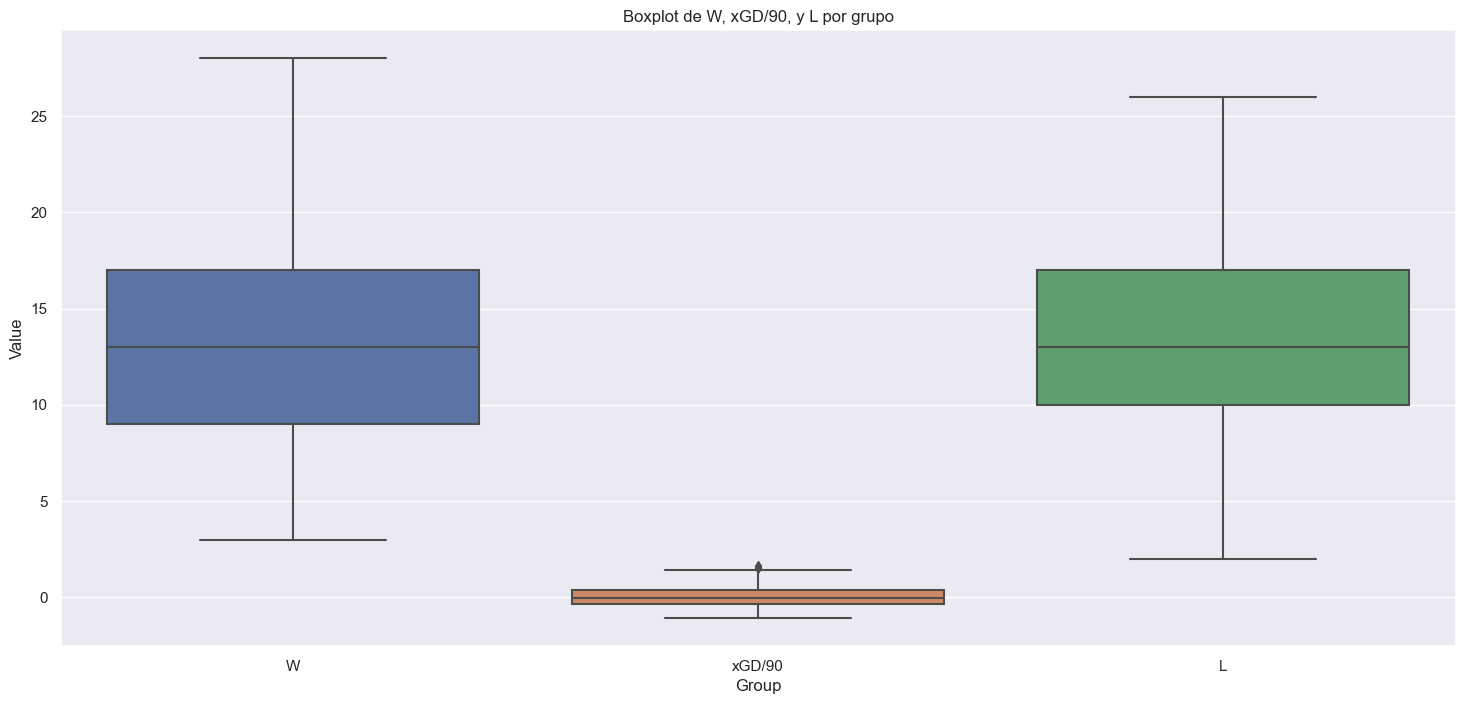

In [35]:
# Podemos adicionalmente hacer un boxplot para visualizar esas diferencias entre grupos.

sns.boxplot(x='Group', y='Value', data=df_tukey)
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Boxplot de W, xGD/90, y L por grupo')
plt.show()

En este gráfico boxplot, observamos esas diferencias significativas de medias entre los grupos 'W' Vs 'xGD/90' y 'L' Vs 'xGD/90'.